# 🎯 Gradient Boosting & XGBoost Models (Without Temp-R)

In this notebook, we train and evaluate two ensemble models without using the temperature feature (`Temp-R`):
- Gradient Boosting Regressor (GBR)
- XGBoost Regressor (XGB)

Removing `Temp-R` simulates situations where weather data is unavailable.

We evaluate models using:
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² Score (Explained Variance)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# 📥 Load the cleaned dataset
data = pd.read_csv('../data/ready_for_models_final.csv')
print(f"✅ Data loaded! Shape: {data.shape}")


✅ Data loaded! Shape: (98095, 204)


In [7]:
# 🛠️ Group the data by date, topic, rain, and holiday
group_keys = []
group_keys += [col for col in data.columns if col.startswith('שנה_')]
group_keys += [col for col in data.columns if col.startswith('חודש_')]
group_keys += [col for col in data.columns if col.startswith('יום_')]
group_keys += [col for col in data.columns if col.startswith('נושא_')]
group_keys += ['חג', 'Rain', 'Temp-R']

agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')
print(f"✅ Aggregated shape: {agg_daily_topic.shape}")


✅ Aggregated shape: (31894, 114)


C:\Users\mevas\AppData\Local\Temp\ipykernel_17820\4204982687.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')
C:\Users\mevas\AppData\Local\Temp\ipykernel_17820\4204982687.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')
C:\Users\mevas\AppData\Local\Temp\ipykernel_17820\4204982687.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

In [8]:
# ✂️ Define features and target
X = agg_daily_topic.drop(columns=['calls_count', 'Temp-R'])
y = agg_daily_topic['calls_count']

print(f"✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")


✅ X shape: (31894, 112)
✅ y shape: (31894,)


In [9]:
# 🧪 Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# 🚀 Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# 📈 Predict
y_pred_gbr = gbr.predict(X_test)


In [11]:
# 📊 Evaluate GBR
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("=== Gradient Boosting Results ===")
print(f"MAE: {mae_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R2 Score: {r2_gbr:.2f}")


=== Gradient Boosting Results ===
MAE: 1.63
RMSE: 2.85
R2 Score: 0.44


In [12]:
# 🚀 Train XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)

# 📈 Predict
y_pred_xgb = xgb.predict(X_test)


In [13]:
# 📊 Evaluate XGB
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("=== XGBoost Results ===")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R2 Score: {r2_xgb:.2f}")


=== XGBoost Results ===
MAE: 1.53
RMSE: 2.78
R2 Score: 0.47


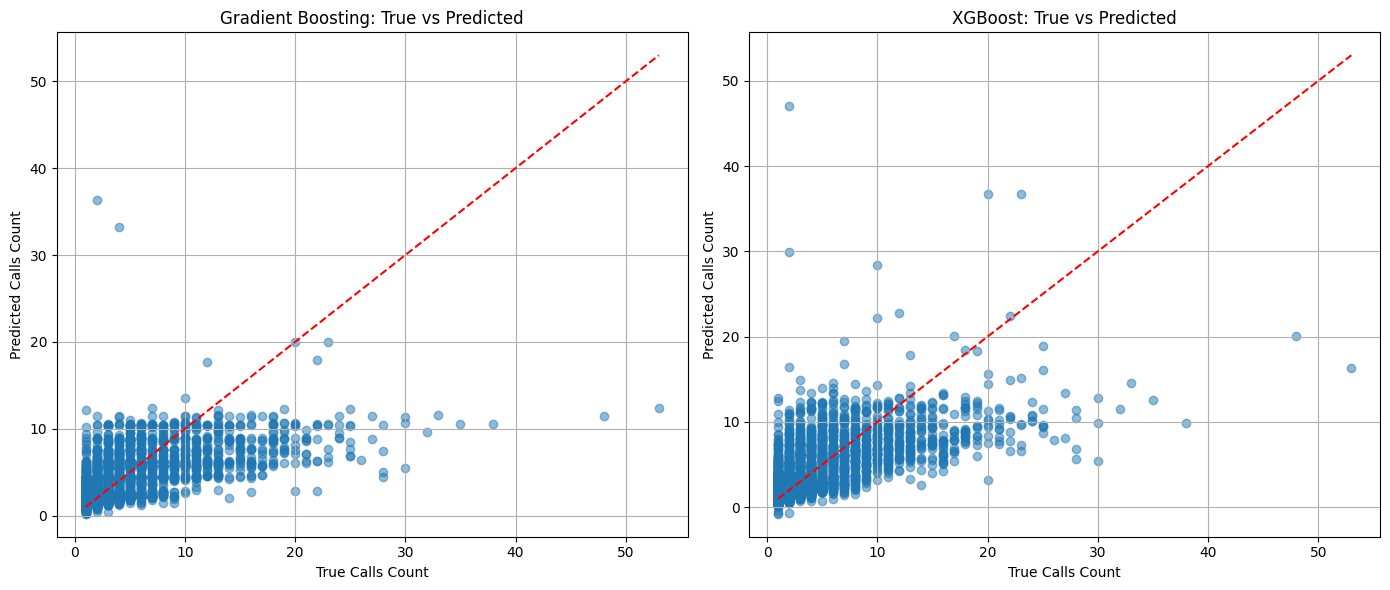

In [14]:
# 📈 Plot True vs Predicted for both models
plt.figure(figsize=(14,6))

# GBR
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gradient Boosting: True vs Predicted')
plt.xlabel('True Calls Count')
plt.ylabel('Predicted Calls Count')
plt.grid(True)

# XGB
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('XGBoost: True vs Predicted')
plt.xlabel('True Calls Count')
plt.ylabel('Predicted Calls Count')
plt.grid(True)

plt.tight_layout()
plt.show()


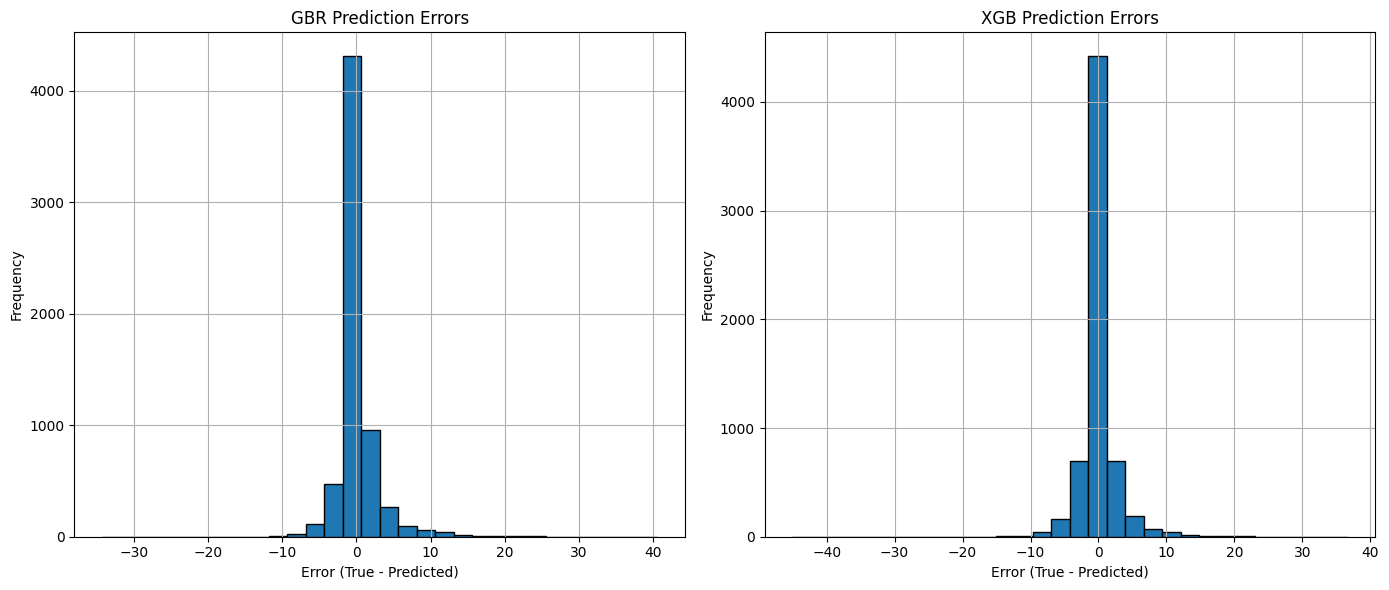

In [15]:
# 📊 Plot errors distribution

errors_gbr = y_test - y_pred_gbr
errors_xgb = y_test - y_pred_xgb

plt.figure(figsize=(14,6))

# GBR Errors
plt.subplot(1,2,1)
plt.hist(errors_gbr, bins=30, edgecolor='black')
plt.title('GBR Prediction Errors')
plt.xlabel('Error (True - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

# XGB Errors
plt.subplot(1,2,2)
plt.hist(errors_xgb, bins=30, edgecolor='black')
plt.title('XGB Prediction Errors')
plt.xlabel('Error (True - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


# ✅ Summary

Both Gradient Boosting and XGBoost performed well even without `Temp-R`.
- XGBoost showed slightly better MAE and R².
- Models are robust to the absence of temperature data.
- Further improvements could be achieved by adding momentum features.
